# ML1: Hierarchical Clustering

By: Gavin

## Importing the libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Importing the dataset

In [62]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

## Clean Dataset

In [63]:
# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code,Profession_Code
0,1,Male,19,15000,39,Healthcare,1,4,1,5
1,2,Male,21,35000,81,Engineer,3,3,1,2
2,3,Female,20,86000,6,Engineer,1,1,0,2
3,4,Female,23,59000,77,Lawyer,0,2,0,7
4,5,Female,31,38000,40,Entertainment,2,6,0,3


## Using the dendrogram to find the optimal number of clusters

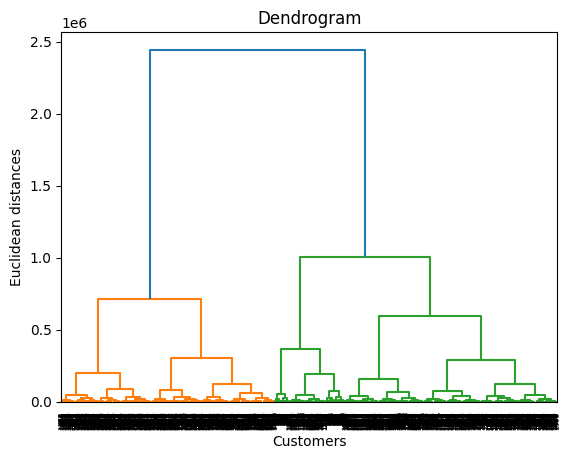

In [64]:
# Select relevant columns for clustering
X = df[['Age', 'Annual Income ($)', 'Gender_Code', 'Profession_Code']]

# Convert to NumPy array
X = X.to_numpy()

# Perform hierarchical clustering using ward linkage
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set title and axis labels for dendrogram
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

# Show dendrogram
plt.show()



## Training the Hierarchical Clustering model on the dataset

In [65]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

c:\Users\Gavin\Desktop\project2-data-analytics\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualising the clusters

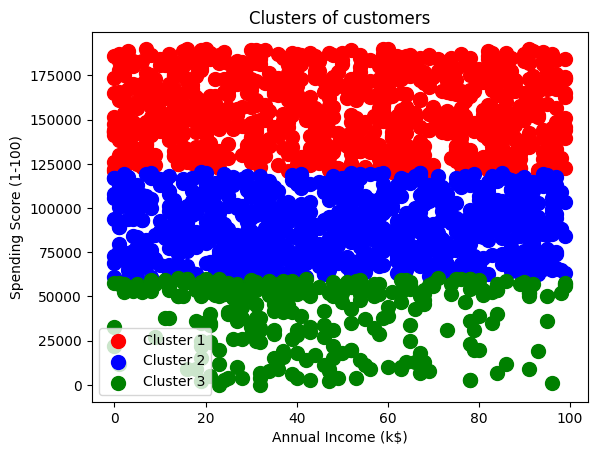

In [66]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

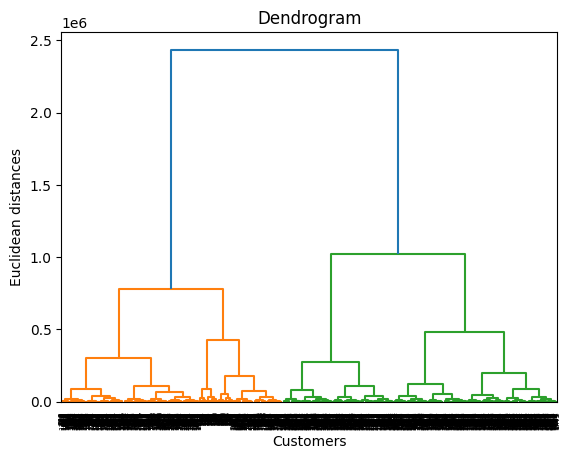

In [67]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

X = df.iloc[:, [3, 4]].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [68]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

c:\Users\Gavin\Desktop\project2-data-analytics\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


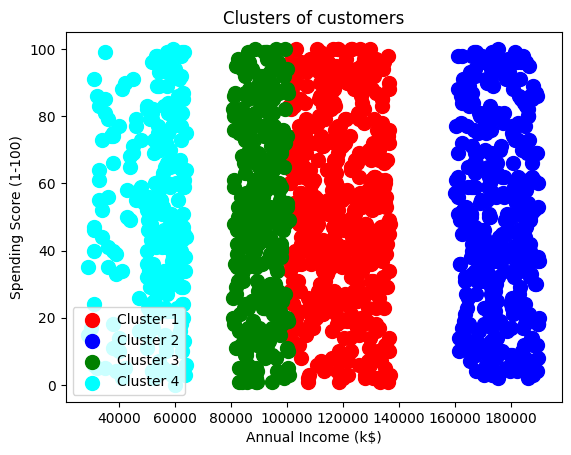

In [69]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()